'''1) Extract reviews of any product from ecommerce website like amazon

2) Perform emotion mining'''


In [3]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Data collection and description
###Connecting to Amazon and download reviews

In [5]:
# creating empty reviews list
oneplus_reviews=[]
for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/Test-Exclusive-747/product-reviews/B07DJCVTDN/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)
    oneplus_reviews = oneplus_reviews+op

In [6]:
oneplus_reviews

['\nDesign – A Familiar Face With a Dash of NewLet’s start with the design. Users of older Oneplus phones will instantly recognize the front side of the phone. It has the same teardrop notch that the company has provided in every phone since the Oneplus 6T. And honestly, it doesn’t bother me at all. A notch-less design would have been appreciated, but that’s reserved for the “Pro” model.But here’s the big twist- rounded triple-camera layout. Remember Motorola? That’s exactly what the Oneplus 7T looks like, and the “Triple Lens” carved right above the, well, triple-lens system, doesn’t help. At its best, it helps in distinguishing itself from the rest of the lineup. At worst, it sticks out, literally, like a sore thumb. That’s not to say that I haven’t grown into it, but given the Oneplus 7T Pro’s more predictable design, it does get me to ask “Why did Oneplus make it look like this?”The phone sports a single USB-C port which is used for charging using Warp CHarge 30T. The latest update

In [7]:
len(oneplus_reviews)

160

In [8]:
oneplus_reviews = list(set(oneplus_reviews))

In [9]:
oneplus_reviews

["\nUpdate 2: currently on 10.3.4 and after almost a year the device is still going strong. No signs of slowing down or any kind of performance deterioration. Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly. Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10. Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a transparent silicon case in the box.As always Cable quality is great and Charger is well built.Display quality is great and as in the spec sheet it is a HDR10+ certified display which provides gorgeous colors and great vie

In [10]:
len(oneplus_reviews)

10

### Cleaning the text

In [12]:
txt_upd = ' '.join(oneplus_reviews)
len(txt_upd)

41124

In [13]:
txt_upd

'\nUpdate 2: currently on 10.3.4 and after almost a year the device is still going strong. No signs of slowing down or any kind of performance deterioration. Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly. Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10. Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a transparent silicon case in the box.As always Cable quality is great and Charger is well built.Display quality is great and as in the spec sheet it is a HDR10+ certified display which provides gorgeous colors and great view

In [14]:
txt_upd = re.sub("[^A-Za-z" "]+"," ",txt_upd).lower() #remove special character
txt_upd = re.sub("[0-9" "]+"," ",txt_upd).lower() #remove numbers
txt_upd = re.sub(r'^https?:\/\/.*[\r\n]*', '', txt_upd).lower() #remove hyperlink

In [15]:
text_tokens = word_tokenize(txt_upd)

In [16]:
text_tokens

['update',
 'currently',
 'on',
 'and',
 'after',
 'almost',
 'a',
 'year',
 'the',
 'device',
 'is',
 'still',
 'going',
 'strong',
 'no',
 'signs',
 'of',
 'slowing',
 'down',
 'or',
 'any',
 'kind',
 'of',
 'performance',
 'deterioration',
 'last',
 'geekbench',
 'score',
 'was',
 'same',
 'as',
 'the',
 'day',
 'i',
 'got',
 'it',
 'which',
 'means',
 'oxygen',
 'os',
 'is',
 'still',
 'optimized',
 'perfectly',
 'only',
 'drawback',
 'for',
 'this',
 'device',
 'is',
 'fingerprint',
 'reader',
 'which',
 'slowly',
 'starts',
 'to',
 'forget',
 'your',
 'fingers',
 'and',
 'doesnt',
 'recognize',
 'them',
 'if',
 'you',
 'have',
 'more',
 'than',
 'fingers',
 'enrolled',
 'update',
 'just',
 'got',
 'the',
 'new',
 'update',
 'to',
 'oxygen',
 'os',
 'and',
 'the',
 'issues',
 'with',
 'the',
 'gaming',
 'mode',
 'are',
 'gone',
 'been',
 'using',
 'this',
 'for',
 'days',
 'now',
 'and',
 'let',
 'me',
 'say',
 'this',
 'first',
 'this',
 'is',
 'a',
 'great',
 'device',
 'and',
 

In [17]:
len(text_tokens)

7539

In [18]:
#Counting tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(text_tokens)
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
wf_df = pd.DataFrame(words_freq)
wf_df.columns = ['word', 'count']


wf_df[0:10]

,word,count
0,the,453
1,and,202
2,is,186
3,to,159
4,it,150
5,of,119
6,in,101
7,you,91
8,this,79
9,for,73


<AxesSubplot:title={'center':'Top word'}, xlabel='word'>

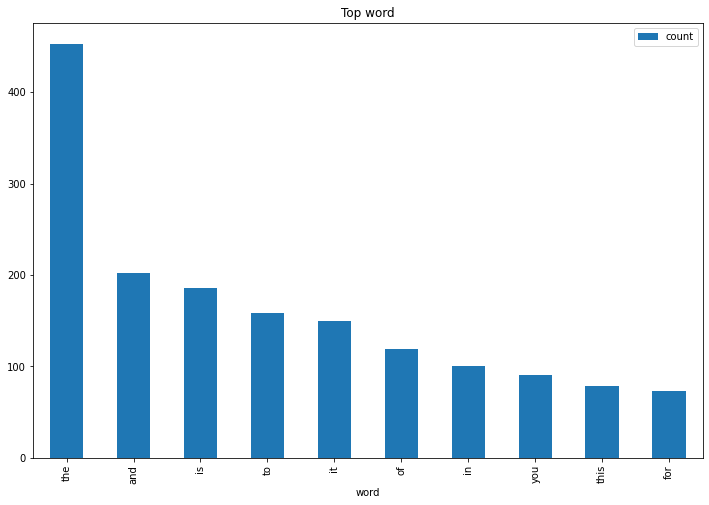

In [19]:
##Visualizing results
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top word')

# Emotion Mining

In [20]:
from google.colab import files
uploaded = files.upload()

Saving Afinn.csv to Afinn.csv


In [21]:
#Sentiment analysis
afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [29]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(oneplus_reviews))
sentences[5:15]

["I haven't used any device till now that can surpass the fluidity of this device.",
 'Everything feels so natural and seamless.The 90Hz display is just great and adds to the faster experience of the device.Speakers are not as good as the ASUS ROG Phone 2 or the iPhone XS PRO MAX but they are great for the price range and may be equal to Samsung Note series.Call quality is great on JIO and Vodafone networks, Mic also performs a great job in cancelling the ambient noise so the other party can hear your voice clearly in both loudspeaker and normal modes.Charging speeds are great too.',
 'Got the device fully charged from 15% tot 100% in just and hour and that is great.The new Android 10  with Oxygen OS is great and fluid as I said earlier but there are still some bugs to be fixed by the OnePlus team.The front camera is great for casual selfies in ample light situations but in low light the software is not yet optimized yet.The same goes for the triple camera setup at the back.',
 'It is 

In [30]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,\nUpdate 2: currently on 10.3.4 and after almo...
1,No signs of slowing down or any kind of perfor...
2,Last geekbench 5 score was same as the day I g...
3,Only drawback for this device is fingerprint r...
4,Now here is my review broken down in Pros and ...
...,...
351,Just keep in mind that it’s not as safe as usi...
352,It only works when you’re directly in front of...
353,While the company has been increasing the phon...
354,"The 7T’s design might not be its best, however..."


In [31]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [32]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [37]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        print(sentence)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [48]:
# test that it works
calculate_sentiment(text = 'astound')

astound


3

In [39]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)


Update 2: currently on 10.3.4 and after almost a year the device is still going strong.
No signs of slowing down or any kind of performance deterioration.
Last geekbench 5 score was same as the day I got it, which means oxygen os is still optimized perfectly.
Only drawback for this device is fingerprint reader which slowly starts to forget your fingers and doesnt recognize them if you have more than 2 fingers enrolled.Update 1: just got the new update to oxygen OS 10.0.3 and the issues with the gaming mode are gone....Been using this for 2 days now and let me say this first this is a great device and I am really really glad I bought this and not Samsung Note 10.
Now here is my review broken down in Pros and Cons list.Pros:Comes with pre-applied screen guard and a transparent silicon case in the box.As always Cable quality is great and Charger is well built.Display quality is great and as in the spec sheet it is a HDR10+ certified display which provides gorgeous colors and great viewin

In [40]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(40)

0      16
1      11
2      20
3      77
4     109
5      15
6      90
7      76
8      13
9      16
10    130
11     21
12     21
13     39
14     27
15     18
16     10
17      7
18     10
19     57
20      4
21     23
22     38
23      4
24     24
25     35
26     23
27     31
28     21
29     14
30     41
31     48
32     18
33      7
34     24
35     11
36      8
37     11
38     13
39     34
Name: word_count, dtype: int64

In [41]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
324,"I’m no mobile gamer, but when the experience i...",7,45
184,Ultra wide photos and video(especially the sup...,8,18
295,While wireless charging would have been apprec...,8,18
355,With the clean Oxygen OS based on Android 10 &...,8,41
262,"It takes out superb photos,both in daylight an...",9,38
7,Got the device fully charged from 15% tot 100%...,9,76
150,Awesome ram management and super fast loading ...,10,19
4,Now here is my review broken down in Pros and ...,16,109
6,Everything feels so natural and seamless.The 9...,19,90
264,Only drawback in using GCam is that auxiliary ...,19,71


In [42]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    356.000000
mean       1.280899
std        2.671661
min       -5.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       19.000000
Name: sentiment_value, dtype: float64

In [43]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']>=5].head()

,sentence,sentiment_value,word_count
3,Only drawback for this device is fingerprint r...,5,77
4,Now here is my review broken down in Pros and ...,16,109
6,Everything feels so natural and seamless.The 9...,19,90
7,Got the device fully charged from 15% tot 100%...,9,76
39,"Hence I am putting the display, not in CONS, b...",7,34


In [44]:
sent_df['index']=range(0,len(sent_df))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


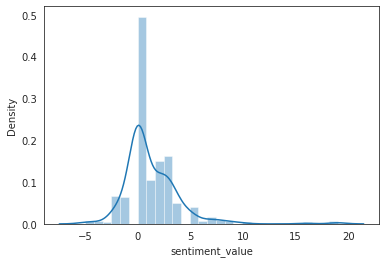

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white') 

sns.distplot(sent_df['sentiment_value'])
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

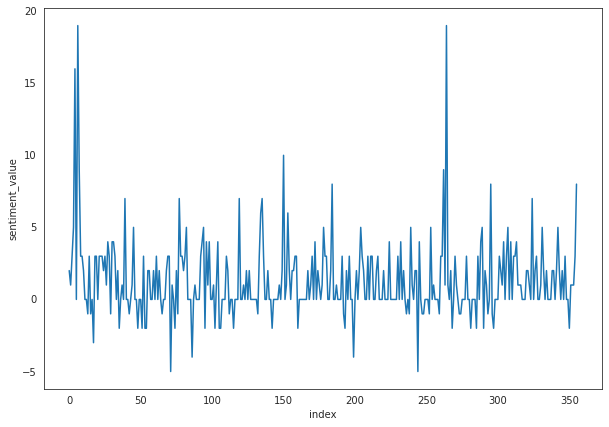

In [46]:
plt.figure(figsize=(10, 7))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

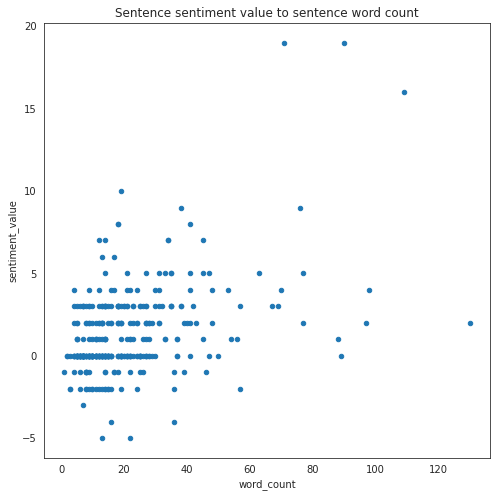

In [47]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')